In [1]:
import matplotlib.pyplot as plt
import numpy as np

print("Setup complete")

Setup complete


In [2]:
def F(x, y):
    return -x*np.sin(np.sqrt(abs(x)))-y*np.sin(np.sqrt(abs(y)))

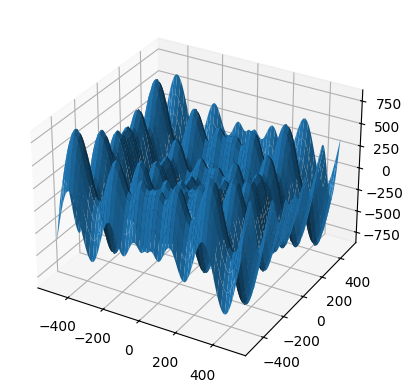

In [3]:
x = np.linspace(-500, 500, 1000)
y = np.linspace(-500, 500, 1000)
X, Y = np.meshgrid(x, y)
Z = F(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

In [4]:
def simple_stochastic_search(X, Y, N, F):
    x_rand = np.random.choice(X.reshape(X.size), N)
    y_rand = np.random.choice(Y.reshape(Y.size), N)

    Z = F(x_rand, y_rand)
    min_value = np.min(Z)

    coord_min = np.where(Z==min_value)[0][0]
    return min_value, [x_rand[coord_min], y_rand[coord_min]]

In [5]:
simple_stochastic_search(X, Y, 10_000, F)

(-834.6158368005205, [419.91991991991995, 415.915915915916])

In [8]:
def annealing(t, t_min, alpha):
    x, y = np.random.uniform(-500, 500), np.random.uniform(-500, 500)

    while t > t_min:
        x_new, y_new = np.random.uniform(-500, 500), np.random.uniform(-500, 500)

        delta_e = F(x_new, y_new) - F(x, y)

        p = np.exp(-delta_e / t)

        if delta_e < 0 or np.random.uniform(0, 1) < p:
            x, y = x_new, y_new

        t *= alpha

    return x, y

x_min, y_min = annealing(.5, 10**-4, .9999)
print(f"Мінімальне значення функції F(x, y):{F(x_min, y_min)}")
print(f"Мінімум знаходиться в точці ({x_min}, {y_min})")

C:\Users\berku\AppData\Local\Temp\ipykernel_32640\59158398.py:9: RuntimeWarning: overflow encountered in exp
  p = np.exp(-delta_e / t)


Мінімальне значення функції F(x, y):-837.4572326405003
Мінімум знаходиться в точці (420.16930140923455, 422.80979431405854)
